([], [])

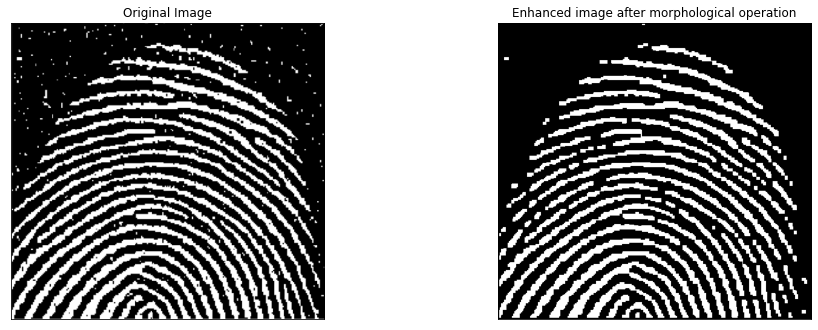

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def open_opr(im1, sz):                                   #opening operation
    row = im1.shape[0]
    col = im1.shape[1]

    structuring_ele = np.ones((sz, sz), dtype='uint8')    #to get the structuring element of size sz

    for i in range(sz):
        for j in range(sz):
            structuring_ele[i][j] = 255                   #setting intensity value 255 complete in it
        

    new_img = np.zeros(im1.shape, dtype='uint8')
    
    d = int(sz/2) 
    
    a = d*2

    padded_img = np.zeros((row+a, col+a), dtype='uint8')   #padding with black borders

    for i in range(d,row+d):
        for j in range(d,col+d):
            padded_img[i][j] = im1[i-d][j-d]              #creating a padded image from original image

    erroded_img= np.zeros((row+a, col+a), dtype='uint8')    #to store the erroded image after doing erosion

    #Erosion part
    for i in range(d,row+d):
        for j in range(d,col+d):
            sub_mat = padded_img[i-d:i+d+1,j-d:j+d+1]    #sub matrix to get corresponding neighbours to apply filter
            #print(sub_mat.shape)
            f = 0
            for p in range(sub_mat.shape[0]):
                for q in range(sub_mat.shape[1]):
                    if sub_mat[p][q] == 0:
                        f = 1                            #f = 1 means it doesn't fit
        
            if f == 1:
                erroded_img[i][j] = 0                    #when doesn't fit set intensity to 0
            else:
                erroded_img[i][j] = 255                  #when fit set intensity to 255

                
    #dilation part
    for i in range(d, row+d):
        for j in range(d, col+d):
            sub_mat = erroded_img[i-d:i+d+1,j-d:j+d+1]     #sub matrix to get corresponding neighbours to apply filter
            f = 0
            for p in range(sub_mat.shape[0]):
                for q in range(sub_mat.shape[1]):
                    if sub_mat[p][q] == 255:
                        f = 1                        # hit when f =1
            if f == 1:
                new_img[i-d][j-d] = 255               #when hit, set intensity to 255
            else:
                new_img[i-d][j-d] = 0                 #when doesn't hit, set intensity to 0
                
    return new_img                                    #return new-image



def close_opr(im1, sz):                              #closing operation
    row = im1.shape[0]
    col = im1.shape[1]

    structuring_ele = np.ones((sz, sz), dtype='uint8')  #to get the structuring element of size sz

    for i in range(sz):
        for j in range(sz):
            structuring_ele[i][j] = 255
        

    new_img = np.zeros(im1.shape, dtype='uint8')
    
    d = int(sz/2) 
    
    a = d*2

    padded_img = np.zeros((row+a, col+a), dtype='uint8')

    for i in range(d,row+d):
        for j in range(d,col+d):
            padded_img[i][j] = im1[i-d][j-d]

    dilated_img= np.zeros((row+a, col+a), dtype='uint8')

    #dilation part
    for i in range(d, row+d):
        for j in range(d, col+d):
            sub_mat = padded_img[i-d:i+d+1,j-d:j+d+1]
            f = 0
            for p in range(sub_mat.shape[0]):
                for q in range(sub_mat.shape[1]):
                    if sub_mat[p][q] == 255:
                        f = 1
            if f == 1:
                dilated_img[i][j] = 255
            else:
                dilated_img[i][j] = 0
    
    
    
    #Erosion part
    for i in range(d,row+d):
        for j in range(d,col+d):
            sub_mat = dilated_img[i-d:i+d+1,j-d:j+d+1]    #sub matrix to get corresponding neighbours to apply filter
            #print(sub_mat.shape)
            f = 0
            for p in range(sub_mat.shape[0]):
                for q in range(sub_mat.shape[1]):
                    if sub_mat[p][q] == 0:
                        f = 1
        
            if f == 1:
                new_img[i-d][j-d] = 0
            else:
                new_img[i-d][j-d] = 255
                
    return new_img
    


img1 = cv2.imread("fingerprint.png")

im1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)     #converting to grayscale image

ret, im1 = cv2.threshold(im1,127,255,cv2.THRESH_BINARY)      #thresholding

n_im1 = open_opr(im1, 5)

n_img = close_opr(n_im1, 5)

kernel = np.ones((5, 5), np.uint8)
in_img = cv2.erode(im1, kernel)
in_img = cv2.dilate(in_img, kernel)
in_img = cv2.dilate(in_img, kernel)
in_img = cv2.erode(in_img, kernel)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
n_img = cv2.cvtColor(n_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])


plt.subplot(2,2,2)
plt.imshow(n_img)
plt.title('Enhanced image after morphological operation')
plt.xticks([])
plt.yticks([])
        

Total no. of disks is: 14


([], [])

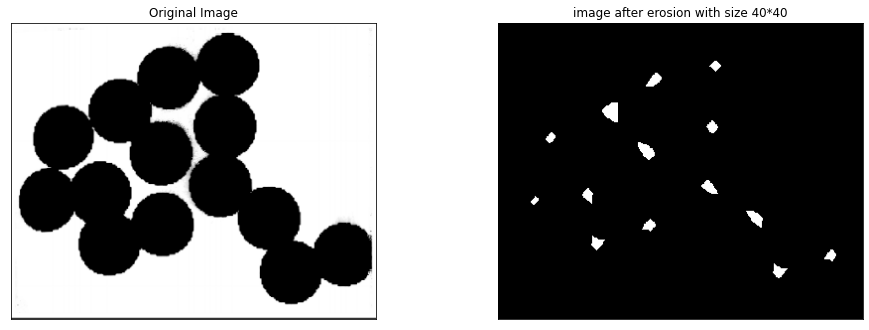

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from queue import Queue

def BFS(res_mat, visited, start_row, start_col):
    
    rows = [-1, -1, -1, 0, 0, 1, 1, 1]        #to consider in all 8 directions
    cols = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    R = res_mat.shape[0]
    C = res_mat.shape[1]
    
    q = Queue(0)                             #queue of infinite size
    q.put([start_row, start_col])
    visited[start_row][start_col] = True
    
    while q.empty() == False:
        tmp = q.get()
        i = tmp[0]
        j = tmp[1]
        for k in range(8):
            i_n = i + rows[k]
            j_n = j + cols[k]
            if (i_n >= 0) and (i_n < R) and (j_n >= 0) and (j_n < C) and (res_mat[i_n][j_n] == 1) and (visited[i_n][j_n] == False):
                visited[i_n][j_n] = True
                q.put([i_n, j_n])
                                                                                           
        
    
    
        

def countdisks(res_mat, row, col):
    temp = np.zeros((row, col), dtype='uint8')
    visited = temp.astype(bool)                 #bool matrix to ensure that one pixel doesn't traverse again and again
    
    
    total = 1       #initialisation
    
    for i in range(row):
        for j in range(col):
            if res_mat[i][j] == 1 and visited[i][j] == False:
                BFS(res_mat, visited, i, j)
                total = total + 1
    
    return total



img = cv2.imread("disks.png")

img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)     #converting to grayscale image

ret, img1 = cv2.threshold(img1,150,255,cv2.THRESH_BINARY_INV) 

kernel = np.ones((40, 40), np.uint8)
image = cv2.erode(img1, kernel)

row = image.shape[0]
col = image.shape[1]

res = np.zeros(image.shape, dtype='uint8')   #to store binary matrix of image for BFS traversal  

for i in range(row):
    for j in range(row):
        if image[i][j] == 255:
            res[i][j] = 1
        else:
            res[i][j] = 0

ans = countdisks(res, row, col)

print("Total no. of disks is: {}".format(ans))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])


plt.subplot(2,2,2)
plt.imshow(image)
plt.title('image after erosion with size 40*40')
plt.xticks([])
plt.yticks([])

Centroid Position at: (371, 284)


([], [])

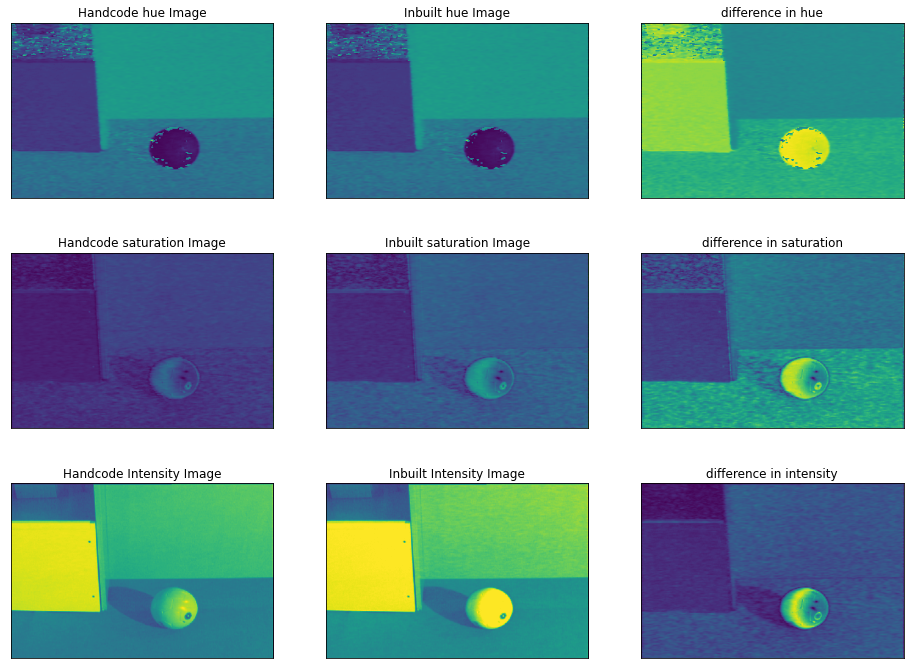

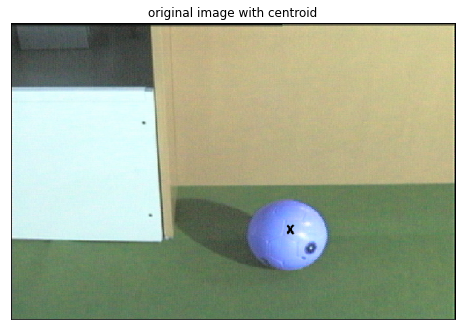

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#Calculate Intensity
def calc_intensity(red, blue, green):
    return np.divide(blue + green + red, 3)

#Calculate Saturation
def calc_saturation(red, blue, green):
    minimum = np.minimum(np.minimum(red, green), blue)
    saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)
    return saturation

 #Calculate Hue
    
def calc_hue(red, blue, green):
    R = red
    G = green
    B = blue
    a = (0.5) * np.add(np.subtract(R,G), np.subtract(R,B))           # (1/2)*[(R-G)+(R-B)]
    
    b = np.sqrt(np.add(np.power(np.subtract(R,G), 2) , np.multiply(np.subtract(R,B),np.subtract(G,B))))
    
    tetha = np.arccos( np.divide(a, b, out=np.zeros_like(a), where=b!=0) ) # when b = 0, division returns 0, so then tetha = 90
    
    H = (180/math.pi)*tetha # convert rad to degree
    
    H[B>G] = 360-H[B>G]
    
    return H


def Myrgb2hsi(img):
    #Load image with 32 bit floats as variable type
    bgr = np.float32(img)/255

    #Separate color channels
    blue = bgr[:,:,0]
    green = bgr[:,:,1]
    red = bgr[:,:,2]

    h = calc_hue(red, blue, green)
    s = calc_saturation(red, blue, green)
    i = calc_intensity(red, blue, green)

    #Merge channels into a list and return
    hsi = []
    hsi.append(h)
    hsi.append(s)
    hsi.append(i)
    return hsi



img = cv2.imread("ball.bmp")

im_n = Myrgb2hsi(img)

in_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h_in = in_img[:,:,0] / 255
s_in = in_img[:,:,1] / 255
v_in = in_img[:,:,2] / 255

im_h = np.array(im_n[0])
im_s = np.array(im_n[1])
im_i = np.array(im_n[2])


#diff_h = cv2.subtract(h_in, im_h)
#diff_s = cv2.subtract(s_in, im_s)
#diff_i = cv2.subtract(v_in, im_i)

diff_h = h_in - im_h
diff_s = s_in - im_s
diff_i = v_in - im_i

plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
plt.imshow(im_n[0])
plt.title('Handcode hue Image')
plt.xticks([])
plt.yticks([])


plt.subplot(3,3,4)
plt.imshow(im_n[1])
plt.title('Handcode saturation Image')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,7)
plt.imshow(im_n[2])
plt.title('Handcode Intensity Image')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,2)
plt.imshow(h_in)
plt.title('Inbuilt hue Image')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,5)
plt.imshow(s_in)
plt.title('Inbuilt saturation Image')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,8)
plt.imshow(v_in)
plt.title('Inbuilt Intensity Image')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,3)
plt.imshow(diff_h)
plt.title('difference in hue')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,6)
plt.imshow(diff_s)
plt.title('difference in saturation')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,9)
plt.imshow(diff_i)
plt.title('difference in intensity')
plt.xticks([])
plt.yticks([])

ret, img1 = cv2.threshold(h_in,0.06,1,cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
img1 = cv2.erode(img1, kernel)
kernel1 = np.ones((9, 9), np.uint8)
img1 = cv2.dilate(img1, kernel1)


M = cv2.moments(img1)     # calculate moments of binary image

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

print("Centroid Position at: {}".format((cX, cY)))
cv2.putText(img, "X", (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.imshow(img)
plt.title('original image with centroid')
plt.xticks([])
plt.yticks([])


(284, 561)


([], [])

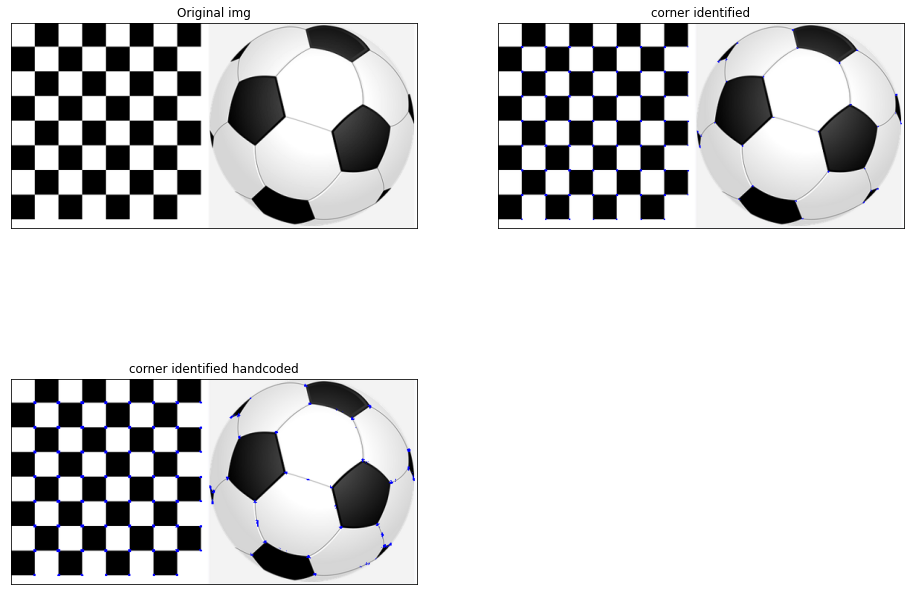

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def findCorners(img, window_size, k, thresh):
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]
    
    print((height,width))

    cornerList = []
    newImg = img.copy()
    offset = int(window_size/2)


    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()


            det = (Sxx * Syy) - (Sxy**2)          #lambda1 * lambda2
            trace = Sxx + Syy                     #lambda1 + lambda2
            r = det - k*(trace**2)                #response value
        

            if r > thresh:
                
                cornerList.append((y,x))
                
    return cornerList



img = cv2.imread("corner_test.png")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

img_new = img.copy()
img_new[dst > 0.01 * dst.max()]=[255, 0, 0]

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original img')
plt.xticks([])
plt.yticks([])



img_new = cv2.cvtColor(img_new,cv2.COLOR_BGR2RGB)

plt.subplot(2,2,2)
plt.imshow(img_new)
plt.title('corner identified')
plt.xticks([])
plt.yticks([])


cornerList = findCorners(gray,3,0.04,0.01 * dst.max())

for px in cornerList:
    
    img[px[0],px[1],0] = 255
    img[px[0],px[1],1] = 0
    img[px[0],px[1],2] = 0



img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(2,2,3)
plt.imshow(img)
plt.title('corner identified handcoded')
plt.xticks([])
plt.yticks([])

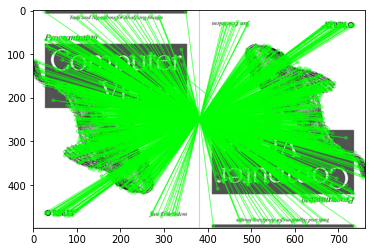

(<matplotlib.image.AxesImage at 0x150ba0ee850>, None)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random
%matplotlib inline

MIN_MATCH_COUNT = 10

img1 = cv2.imread('FM_img1.jpg',0)          
img2 = cv2.imread('FM_img2.jpg',0)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ])
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ])
        
        
#RANSAC
# pick any 3 points

best_affine = None
max_inliers_so_far = -1
threshold_error = 0.01

for i in range(17):
    inliers = 0
    rand_idx = random.choices(range(len(src_pts)), k=3)
    rand_src = [src_pts[rand_idx[0]],src_pts[rand_idx[1]],src_pts[rand_idx[2]]]
    
    rand_dst = [dst_pts[rand_idx[0]],dst_pts[rand_idx[1]],dst_pts[rand_idx[2]]]
    
    affine_t = cv2.getAffineTransform(np.float32(rand_src),np.float32(rand_dst))
#     print(affine_t)
    
    for i in range(len(src_pts)):
        
        extended = np.hstack((src_pts[i],1))
        prod = np.matmul(affine_t,extended)
        err = sum((prod -dst_pts[i])**2)
        if err<threshold_error:
            inliers+=1
        if inliers>int(0.90*len(src_pts)):
            best_affine = affine_t
            break
        if inliers> max_inliers_so_far:
            max_inliers_so_far = inliers
            best_affine = affine_t
        
new_dst =[]
for i in range(len(src_pts)):
    extended = np.hstack((src_pts[i],1))
    prod = np.matmul(affine_t,extended)
    new_dst.append(prod)
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)
# img2 = cv2.polylines(img2,[np.int32(new_dst)],True,255,3, cv2.LINE_AA)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()